# Goal: plot all vs. diff csv for data visulization and analysis

Sketch of problem:

* We have info from two sets of csv data: 
* 1) "All" refers to the reads from metagenome that mapped to the certain genome
* 2) "diff" refers to the aboved mapped reads that did not get assembled

* In this combined CVS file, we gathered following info:
* - coverage (averaged fromm each base)
* - CIGAR value, and calculated aligned percentage
* - mapping quality
* - R1, R2, and present/absent in the "diff" file

Questions:
* Can we identify the potential reasons for the mapped reads that did not end up with assembly with scatter plot


data from `/home/zyzhao/AL_onemetagenome/subtract/` on farm.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint

## loading data

In [17]:
df = pd.read_csv('ERR257715.x.GCF_018619275.1.combined_first 100.csv')
df

,all_name1,all_1_cov,all_1_cigar,all_1_pa,all_1_mapq,all_name2,all_2_cov,all_2_cigar,all_2_pa,all_2_mapq,diff_1_present,diff_1_cov,diff_1_cigar,diff_1_mapq,diff_2_present,diff_2_cov,diff_2_cigar,diff_2_mapq
0,ERR257715.2988883/1,160.05,78M1I3M1D19M,0.990099,47.0,ERR257715.2988883/2,173.48,36S65M,0.643564,39.0,diff_1_PRESENT,160.05,78M1I3M1D19M,22.0,diff_2_ABSENT,NaN,NaN,NaN
1,ERR257715.30823299/1,1129.86,8S93M,0.920792,13.0,ERR257715.30823299/2,NaN,NaN,NaN,NaN,diff_1_PRESENT,1129.86,8S93M,13.0,diff_2_ABSENT,NaN,NaN,NaN
2,ERR257715.5012085/1,NaN,NaN,NaN,NaN,ERR257715.5012085/2,12.53,26S75M,0.742574,14.0,diff_1_ABSENT,NaN,NaN,NaN,diff_2_PRESENT,12.53,26S75M,14.0
3,ERR257715.20455746/1,1.19,101M,1.000000,60.0,ERR257715.20455746/2,2.96,101M,1.000000,60.0,diff_1_PRESENT,1.19,101M,60.0,diff_2_PRESENT,2.96,101M,60.0
4,ERR257715.24105973/1,2.51,101M,1.000000,60.0,ERR257715.24105973/2,1.00,21S80M,0.792079,60.0,diff_1_PRESENT,2.51,101M,60.0,diff_2_PRESENT,1.00,21S80M,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ERR257715.9027025/1,NaN,NaN,NaN,NaN,ERR257715.9027025/2,541.20,101M,1.000000,12.0,diff_1_ABSENT,NaN,NaN,NaN,diff_2_PRESENT,541.20,101M,12.0
96,ERR257715.19542709/1,1.72,101M,1.000000,60.0,ERR257715.19542709/2,2.22,101M,1.000000,60.0,diff_1_PRESENT,1.72,101M,49.0,diff_2_PRESENT,2.22,101M,60.0
97,ERR257715.30852747/1,NaN,NaN,NaN,NaN,ERR257715.30852747/2,2.01,101M,1.000000,60.0,diff_1_ABSENT,NaN,NaN,NaN,diff_2_PRESENT,2.01,101M,60.0
98,ERR257715.24076610/1,1.28,101M,1.000000,60.0,ERR257715.24076610/2,3.41,101M,1.000000,60.0,diff_1_PRESENT,1.28,101M,60.0,diff_2_PRESENT,3.41,101M,60.0


In [42]:
all_1_pa_column = df['all_1_pa']
all_1_mq_column = df['all_1_mapq']
all_2_pa_column = df['all_2_pa']
all_2_mq_column = df['all_2_mapq']
print("all_1_pa:", all_1_pa_column.values)

all_1_pa: [0.99009901 0.92079208        nan 1.         1.         0.95049505
 1.         1.                nan 1.                nan 1.
 1.         0.86138614 1.         1.         0.43564356 0.78217822
        nan 1.         0.99009901 0.42574257 1.         0.38613861
        nan 1.         0.77227723        nan 1.         1.
 1.         1.                nan 1.         1.         1.
 0.74257426        nan 0.91089109 1.         1.         1.
        nan 1.         0.91089109 1.         1.         1.
        nan 1.         1.         1.         0.33663366 1.
 0.98019802 0.78217822 0.49504951 1.                nan 1.
 1.         0.98019802 1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.91089109
        nan 1.         1.         1.                nan        nan
 0.55445545 1.                nan 0.97029703 1.         1.
 1.         1.         1.         1.         1.         1.
        nan        nan 0.45544554 1.         1.                na

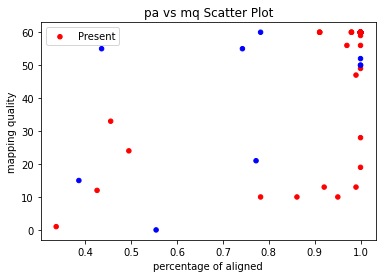

In [49]:
df['color'] = df['diff_1_present'].map({'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'blue'})

df.plot.scatter(x='all_1_pa', y='all_1_mapq', c=df['color'], title='pa vs mq Scatter Plot', xlabel='percentage of aligned', ylabel='mapping quality')
plt.legend(labels=['Present', 'Absent'])
plt.show()


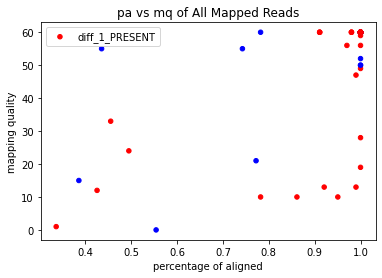

In [53]:
df['color'] = df['diff_1_present'].map({'diff_1_PRESENT': 'Red', 'diff_1_ABSENT': 'blue'})
legend_labels = df['diff_1_present'].unique()
df.plot.scatter(x='all_1_pa', y='all_1_mapq', c=df['color'], title='pa vs mq of All Mapped Reads', xlabel='percentage of aligned', ylabel='mapping quality')
plt.legend(labels=legend_labels)
plt.show()


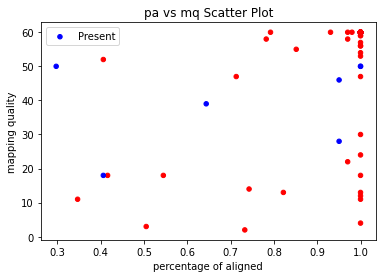

In [51]:
df['color'] = df['diff_2_present'].map({'diff_2_PRESENT': 'Red', 'diff_2_ABSENT': 'blue'})

df.plot.scatter(x='all_2_pa', y='all_2_mapq', c=df['color'], title='pa vs mq Scatter Plot', xlabel='percentage of aligned', ylabel='mapping quality')
plt.legend(labels=['Present', 'Absent'])
plt.show()

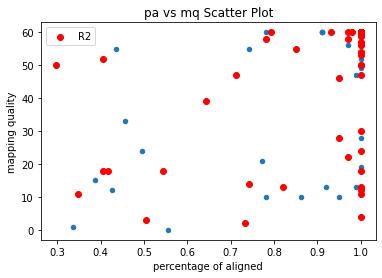

In [39]:
df.plot.scatter(x='all_1_pa', y='all_1_mapq', title='pa vs mq Scatter Plot', xlabel='percentage of aligned', ylabel='mapping quality')
plt.scatter(all_2_pa_column, all_2_mq_column, color='red', label='R2')
plt.legend()
plt.show()

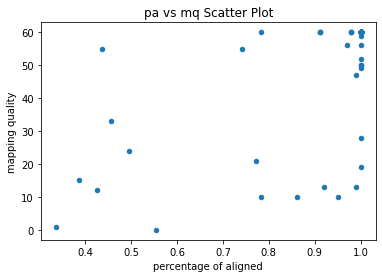

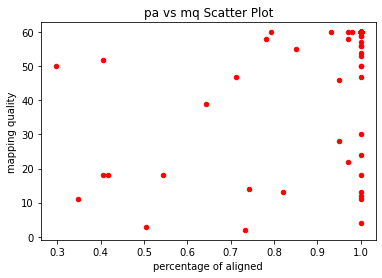

No handles with labels found to put in legend.


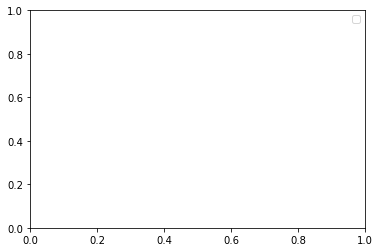

In [38]:
df.plot.scatter(x='all_1_pa', y='all_1_mapq', title='pa vs mq Scatter Plot', xlabel='percentage of aligned', ylabel='mapping quality')
df.plot.scatter(x='all_2_pa', y='all_2_mapq', title='pa vs mq Scatter Plot', color='red', xlabel='percentage of aligned', ylabel='mapping quality')
plt.show()
plt.legend()

In [31]:
all_2_pa_column = df['all_2_pa']
all_2_mq_column = df['all_2_mapq']

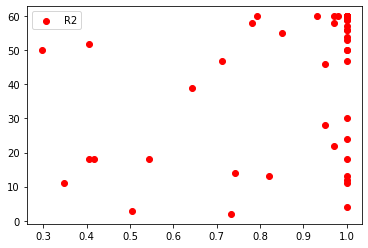

In [35]:
plt.scatter(all_2_pa_column, all_2_mq_column, color='red', label='R2')
plt.legend()
plt.show()